# Q1

## a

The following things could go wrong with the calcution:

1. The dataset contains bulk orders. For example, there are companies purchasing sneakers for thousands of employees. 
2. There are incorrect data in the dataset. For example, the order amount was mistyped.

Regarding assumption 1, I would like to show the distribution of the number of items bought in each order.

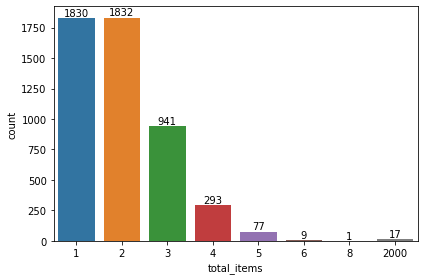

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set.csv')

tmp = pd.DataFrame({'total_items': df['total_items']})
tmp['count'] = tmp.groupby('total_items')['total_items'].transform('count')
tmp.drop_duplicates()

ax = sns.barplot(data=tmp, x='total_items', y='count')
ax.bar_label(ax.containers[0])

plt.tight_layout()
plt.show()

The result shows that there are 17 orders purchasing 2000 pairs of sneakers. Thus, assumption 1 could be true.

Regarding assumption 2, I would like to show the distribution of average selling price in each order.

In [9]:
tmp = pd.DataFrame({
    'shop_id': df['shop_id'],
    'user_id': df['user_id'],
    'order_amount': df['order_amount'],
    'total_items': df['total_items']})

In [10]:
tmp.drop(tmp[tmp.total_items <= 0].index)
tmp['average_selling_price'] = tmp['order_amount'] / tmp['total_items']

tmp['average_selling_price'].describe()

count     5000.000000
mean       387.742800
std       2441.963725
min         90.000000
25%        133.000000
50%        153.000000
75%        169.000000
max      25725.000000
Name: average_selling_price, dtype: float64

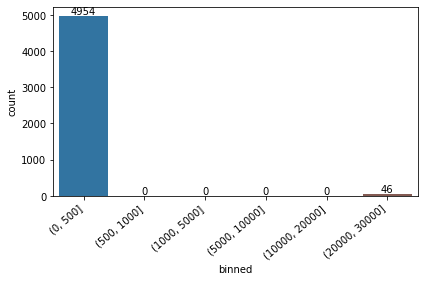

In [11]:
bins = [0, 500, 1000, 5000, 10000, 20000, 30000]
tmp['binned'] = pd.cut(tmp['average_selling_price'], bins)
tmp['count'] = tmp.groupby('binned')['binned'].transform('count')

ax = sns.barplot(data=tmp, x='binned', y='count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.bar_label(ax.containers[0])

plt.tight_layout()
plt.show()

In [21]:
tmp.sort_values(by='binned', ascending=False).head(46).groupby('shop_id')['shop_id'].count()

shop_id
78    46
Name: shop_id, dtype: int64

We found that all of the 46 orders with uncommonly high average selling prices were recorded by the shop of id 78. So this shop might have made some mistakes, such as using cents instead of dollars as the unit of measurement.

I think it is a better way to evaluate this data using the median. The reason is that there could be a few extreme data points in the dataset, either made in particular cases or made by mistakes. Hence, median can better represent the typical value in this dataset.

## b

As discussed in part (a), I would report **median** for this dataset.

## c

In [22]:
df.order_amount.median()

284.0

The median value is **284**.

# Q2

## a

The answer is **54**.

In [ ]:
SELECT COUNT(OrderID)
FROM Orders
INNER JOIN Shippers ON Orders.ShipperID = Shippers.ShipperID
WHERE Shippers.ShipperName = 'Speedy Express';

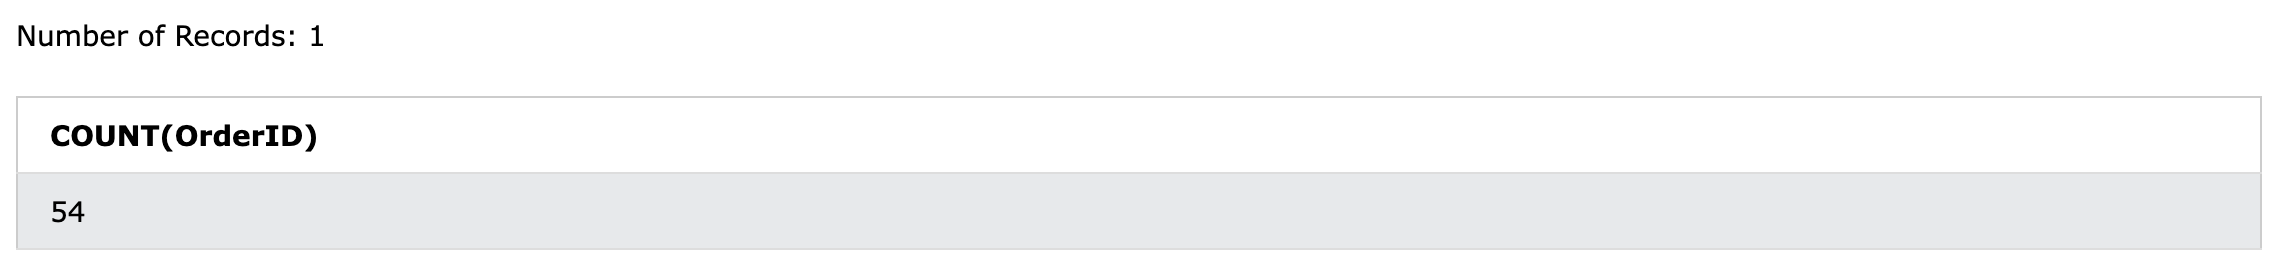

## b

The answer is **Peacock**.

In [ ]:
SELECT LastName, cnt
FROM Employees
INNER JOIN (
  SELECT EmployeeID as eid, COUNT(OrderID) as cnt
  FROM Orders
  GROUP BY EmployeeID
) t1 ON t1.eid = Employees.EmployeeID
ORDER BY cnt DESC
LIMIT 5;

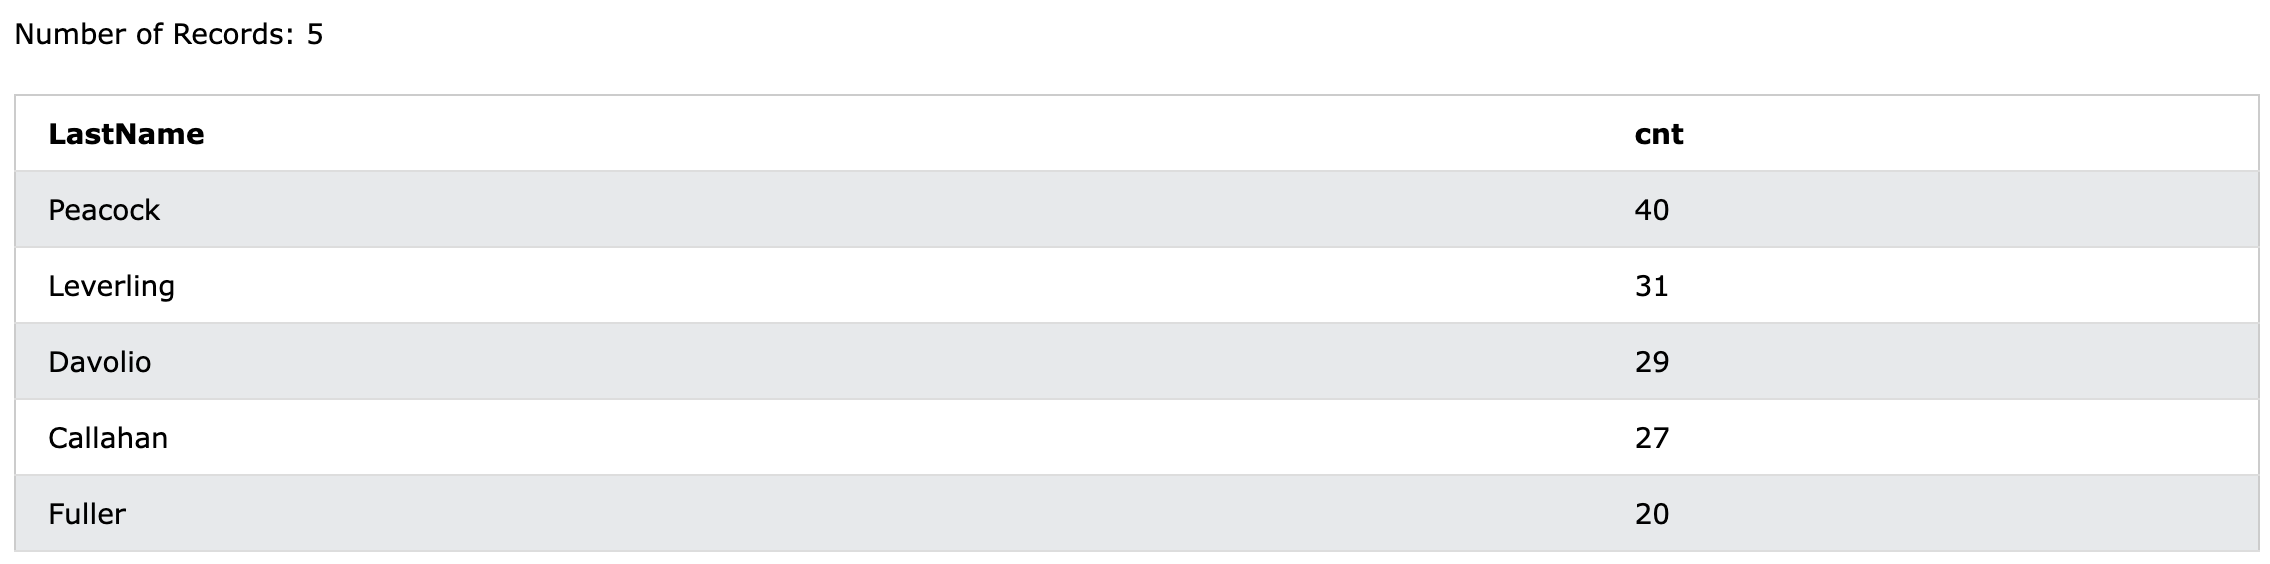

## c

I'm not sure about the definition of "ordered the most". It could mean the number of orders or the total quantity ordered.

If you go with the first one, the answer would be **Gorgonzola Telino**.

In [ ]:
SELECT Products.ProductName, COUNT(OrderDetails.Quantity) as total
FROM Orders
INNER JOIN (
  SELECT CustomerID cid FROM Customers
  WHERE Country = 'Germany'
) t1 ON Orders.CustomerID = t1.cid
INNER JOIN OrderDetails ON Orders.OrderID = OrderDetails.OrderID
INNER JOIN Products ON OrderDetails.ProductID = Products.ProductID
GROUP BY OrderDetails.ProductID
ORDER BY total DESC
LIMIT 5;

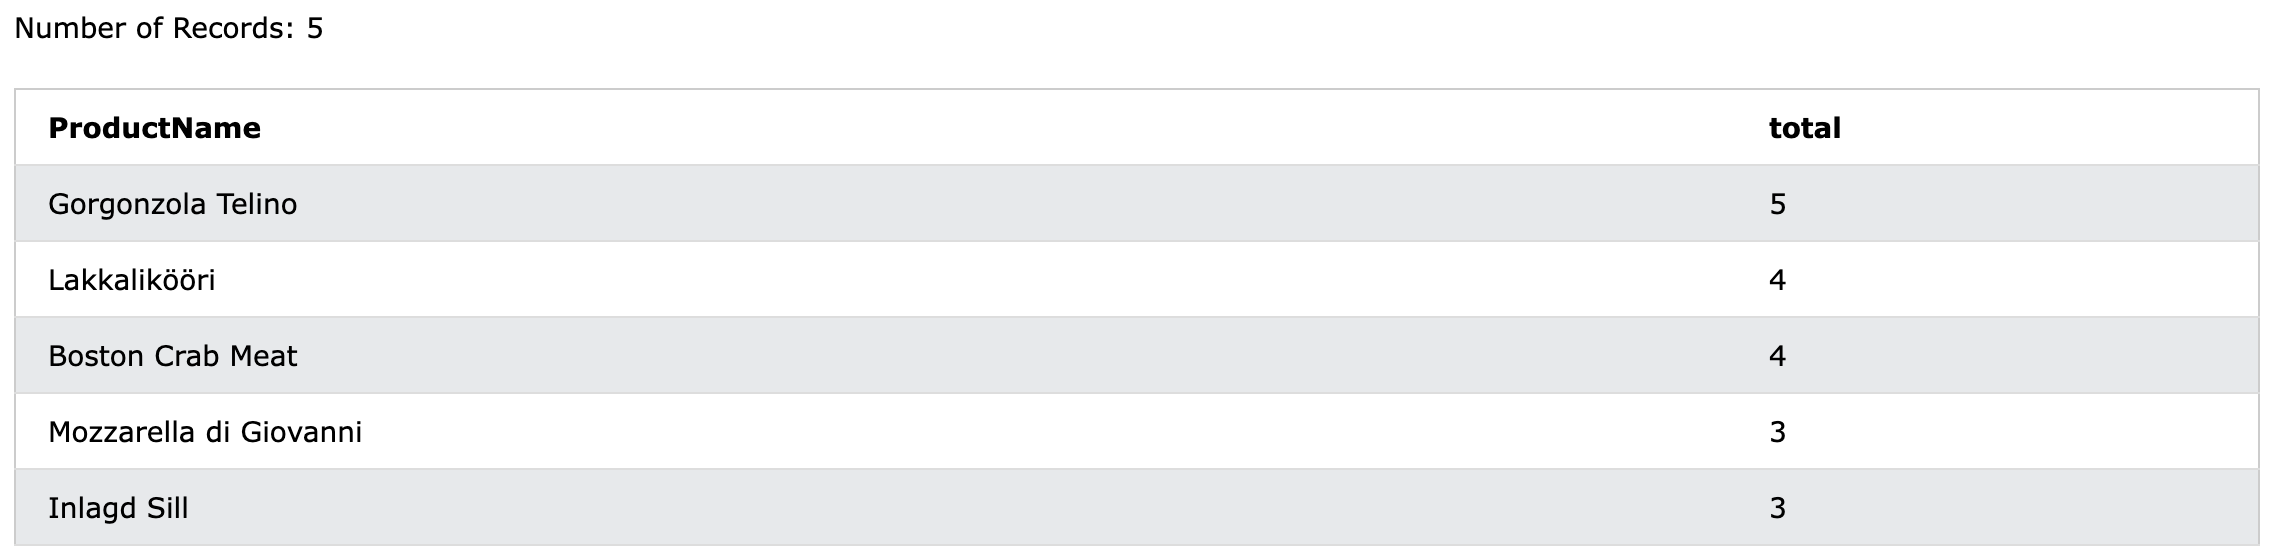

If you agree with the latter one, the answer would be **Boston Crab Meat**.

In [ ]:
SELECT Products.ProductName, SUM(OrderDetails.Quantity) as total
FROM Orders
INNER JOIN (
  SELECT CustomerID cid FROM Customers
  WHERE Country = 'Germany'
) t1 ON Orders.CustomerID = t1.cid
INNER JOIN OrderDetails ON Orders.OrderID = OrderDetails.OrderID
INNER JOIN Products ON OrderDetails.ProductID = Products.ProductID
GROUP BY OrderDetails.ProductID
ORDER BY total DESC
LIMIT 5;

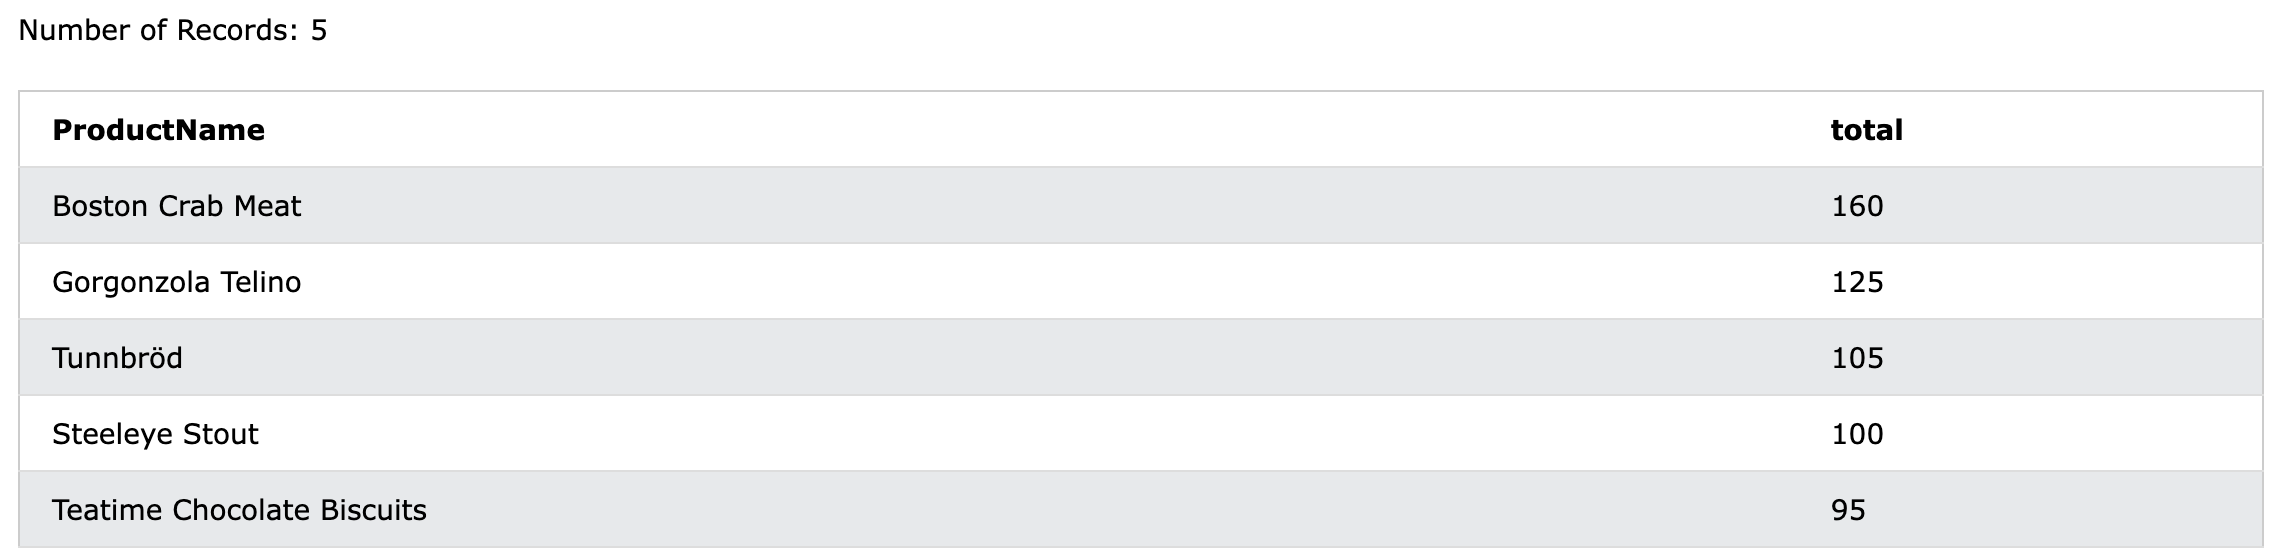

Please note that the only difference between the two SQL scripts is in line 1, using COUNT() or SUM().